In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-data-set/diabetes.csv


# Using Machine Learning Methods to Predict Diabetes

## Import data

In [2]:
data = pd.read_csv('/kaggle/input/diabetes-data-set/diabetes.csv')
data.head(n=10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
np.shape(data)

(768, 9)

## Clean data 
--Get rid of rows that contain zeros in the columns of Glucose,BloodPressure, SkinThickness and BMI

In [5]:
#b= np.sort(data['Age'])
#print(b)

In [6]:
a = data[(data['Glucose'] != 0) & (data['BloodPressure'] != 0) 
         & (data['SkinThickness'] != 0) & (data['BMI'] != 0)]
a.head(n=10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
14,5,166,72,19,175,25.8,0.587,51,1
16,0,118,84,47,230,45.8,0.551,31,1
18,1,103,30,38,83,43.3,0.183,33,0


In [7]:
np.shape(a)

(532, 9)

In [8]:
a.reset_index(inplace=True,drop=True) # reset and update the row index for dataframe a
print(a)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              1       89             66             23       94  28.1   
3              0      137             40             35      168  43.1   
4              3       78             50             32       88  31.0   
..           ...      ...            ...            ...      ...   ...   
527            9      170             74             31        0  44.0   
528           10      101             76             48      180  32.9   
529            2      122             70             27        0  36.8   
530            5      121             72             23      112  26.2   
531            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

## Plot data 
--find the correlation between features to outcome

In [9]:
features = list(a.columns)
features.pop()
print(features,np.shape(features))

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'] (8,)


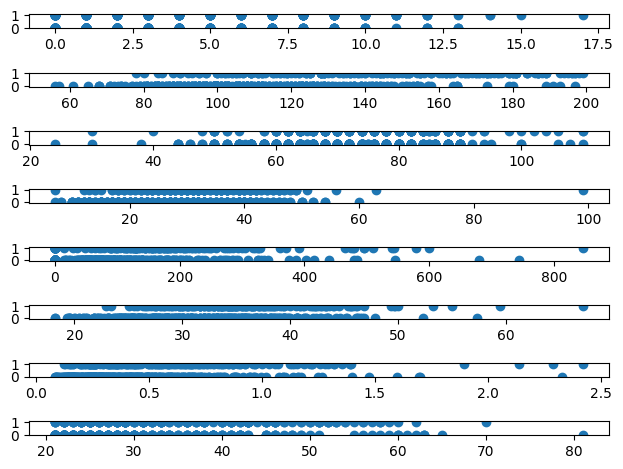

In [10]:
fig, axs = plt.subplots(8,1)
fig.tight_layout()
y = a['Outcome']

for i in range(8):
    x = a[features[i]]
    axs[i].scatter(x,y)
    
# The plots show no obvious correlation between single feature to the outcome. 
# Now let's move into ML part

## ML Model
--Decision trees

In [11]:
training_data, testing_data = train_test_split(a,test_size=0.2,random_state=25)

In [12]:
print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 425
No. of testing examples: 107


In [13]:
X_train = training_data[features]
y_train = training_data['Outcome']
X_test = testing_data[features]
y_test = np.array(testing_data['Outcome'])

In [14]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)

In [15]:
y_predict = dtree.predict(X_test)

In [16]:
score = accuracy_score(y_test,y_predict)
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
print("Accuracy: ", round(score,2))
print("Precision: ",round(precision,2))
print("Recall: ",round(recall,2))
print("F1 Score: ", round(f1,2) )

Accuracy:  0.73
Precision:  0.65
Recall:  0.56
F1 Score:  0.6
